# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [195]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

%matplotlib inline

In [75]:
# Problem 1: Find the 10 countries with most projects

# Read json data file into DataFrame
data = pd.read_json('data/world_bank_projects.json')

# Slice required columns
data_project = data[['countrycode','countryshortname', 'project_name', 'projectstatusdisplay']]

#Consider only Active projects
active_project = data_project[data_project['projectstatusdisplay']=='Active']

# Group by country code and short name and aggregate by count project name for Active and all projects
grouped_active_project = active_project.groupby(['countrycode', 'countryshortname'])[['project_name']].count()
grouped_data_project = data_project.groupby(['countrycode', 'countryshortname'])[['project_name']].count()

grouped_active_project.columns = ['project_count']
grouped_data_project.columns = ['project_count']

# Top 10 countries with most Active projects
active_project_countries = grouped_active_project.sort_values(by= ['project_count'],ascending=False)[:10]
# Top 10 countries with most Active projects
most_project_countries = grouped_data_project.sort_values(by= ['project_count'],ascending=False)[:10]

print("Top 10 Countries with most Active Projects :\n \n {}" .format(active_project_countries))
print("\n Top 10 Countries with most Projects :\n {}" .format(most_project_countries))

Top 10 Countries with most Active Projects :
 
                                 project_count
countrycode countryshortname                 
CN          China                          19
ID          Indonesia                      16
IN          India                          15
VN          Vietnam                        14
RY          Yemen, Republic of             13
BD          Bangladesh                     12
NP          Nepal                          11
3A          Africa                         11
MZ          Mozambique                      9
PK          Pakistan                        9

 Top 10 Countries with most Projects :
                                 project_count
countrycode countryshortname                 
ID          Indonesia                      19
CN          China                          19
VN          Vietnam                        17
IN          India                          16
RY          Yemen, Republic of             13
MA          Morocco                  

In [152]:
# Problem 2: Find the top 10 major project themes (using column 'mjtheme_namecode')

# Read json data 
data = json.load(open('data/world_bank_projects.json'))

# normalization used to create tables from nested element
mjtheme_namecode_data = json_normalize(data,'mjtheme_namecode')

major_project_themes_group = mjtheme_namecode_data.groupby('code') 
major_project_themes_count = major_project_themes_group[['code']].count()
major_project_themes_count.columns = ['major_project_themes_count']
major_project_themes = major_project_themes_count.sort_values(by= ['major_project_themes_count'],ascending=False)[:10]

# Top 10 major project themes
print('\n Top 10 major project themes: \n\n {}' .format(major_project_themes))


 Top 10 major project themes: 

       major_project_themes_count
code                            
11                           250
10                           216
8                            210
2                            199
6                            168
4                            146
7                            130
5                             77
9                             50
1                             38


                                                   major_project_themes_count
code name                                                                    
11   Environment and natural resources management                         250
10   Rural development                                                    216
8    Human development                                                    210
2    Public sector governance                                             199
6    Social protection and risk management                                168
4    Financial and private sector development                             146
7    Social dev/gender/inclusion                                          130
5    Trade and integration                                                 77
9    Urban development                                                     50
1    Economic management                                                   38


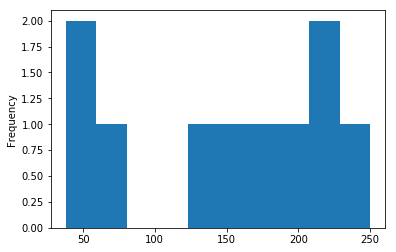

In [264]:
# Problem 2_v2: Find the top 10 major project themes (using column 'mjtheme_namecode') 

# Read json data 
data = json.load(open('data/world_bank_projects.json'))

# normalization used to create tables from nested element
mjtheme_namecode_data = json_normalize(data,'mjtheme_namecode')

# Replace empty name with None
mjtheme_namecode_data.loc[mjtheme_namecode_data['name']=='', 'name'] = None

# Sort data by code and name and forward fill the None values
mjtheme_namecode_data = mjtheme_namecode_data.sort_values(['code', 'name']).ffill().sort_index()

# Find the Top 10 major project themes
mjtheme_namecode_grouped_data = mjtheme_namecode_data.groupby(['code', 'name'])[['code']].count()
mjtheme_namecode_grouped_data.columns = ['major_project_themes_count']
mjtheme_sorted = mjtheme_namecode_grouped_data.sort_values(by=['major_project_themes_count'],ascending=False)[:10]

print(mjtheme_sorted)
mjtheme_sorted['major_project_themes_count'].plot(kind='hist')


  code                                          name
0    8                             Human development
1   11  Environment and natural resources management
2    1                           Economic management
3    6         Social protection and risk management
4    5                         Trade and integration


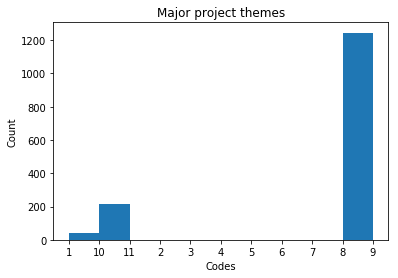

In [259]:
# Problem 3: In 2. above you will notice that some entries have only the code and the name is missing. 
#            Create a dataframe with the missing names filled in.

%matplotlib inline

import matplotlib.pyplot as plt

data = json.load(open('data/world_bank_projects.json'))
mjtheme_namecode_data = json_normalize(data,'mjtheme_namecode')

# Replace empty name with None
mjtheme_namecode_data.loc[mjtheme_namecode_data['name']=='', 'name'] = None

# Sort data by code and name and forward fill the None values
mjtheme_namecode_data = mjtheme_namecode_data.sort_values(['code', 'name']).ffill().sort_index()
print(mjtheme_namecode_data.head())

plt.hist(sorted(list(mjtheme_namecode_data['code'])))
#mjtheme_namecode_data.plot(x='code', y='name',kind='scatter') 
plt.xlabel('Codes')
plt.ylabel('Count')
plt.title('Major project themes')
plt.show()